Malek Belkahla / Elyes Bouaziz / Mohamed Amine Arous

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
%pip install --upgrade pip
%pip install kagglehub
import kagglehub
path = kagglehub.dataset_download('abhi8923shriv/sentiment-analysis-dataset')

# Install the required libraries
%pip install pandas numpy nltk scikit-learn transformers matplotlib seaborn
#%pip uninstall torch torchvision torchaudio -y
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


print('Data source import complete.')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


100%|██████████| 54.4M/54.4M [00:00<00:00, 81.9MB/s]

Extracting files...


Looking in indexes: https://download.pytorch.org/whl/cu121
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 

# Sentiment Analysis on Kaggle sentiment analysis dataset
sentiment analysis tasks on kaggle sentiment analysis dataset using simple machine learning model: Naive bayes


## Including needed libraries

In [ ]:
# --------------- MAIN LIBRARIES ------------------

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


# --------------- HELPING LIBRARIES ----------------
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# ------------- Pytorch Librairies ---------------
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel



In [ ]:
torch.cuda.is_available()

True

## Uploading Data

In [ ]:
train_dataset = path+'/train.csv'
test_dataset = path+'/test.csv'

# Check if the path exists
print (os.path.exists(train_dataset))
print (os.path.exists(test_dataset))

True
True


In [ ]:
# Load the CSV file into a DataFrame
train_df = pd.read_csv(train_dataset, encoding='ISO-8859-1')
test_df = pd.read_csv(test_dataset, encoding='ISO-8859-1')


In [ ]:
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


## Data Preprocessing

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


#### Handling null values

In [ ]:
train_df.isnull().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [ ]:
train_df = train_df.dropna()
train_df.isnull().sum()

,0
textID,0
text,0
selected_text,0
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [ ]:
test_df.isnull().sum()

,0
textID,1281
text,1281
sentiment,1281
Time of Tweet,1281
Age of User,1281
Country,1281
Population -2020,1281
Land Area (Km²),1281
Density (P/Km²),1281


In [ ]:
test_df = test_df.dropna()
test_df.isnull().sum()

,0
textID,0
text,0
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


#### Removing stopwords & lowercase all text

In [ ]:
# Download necessary NLTK data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Text preprocessing function that removes stopwords and convert text to lowercase

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text



In [ ]:
# Apply preprocessing on train dataset
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),processed_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,"i`d responded, going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,sooo sad miss san diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,boss bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,interview! leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,"sons ****, couldn`t put releases already bought"


In [ ]:
# Apply preprocessing on test dataset
test_df['processed_text'] = test_df['text'].apply(preprocess_text)
test_df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),processed_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,last session day http://twitpic.com/67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,shanghai also really exciting (precisely -- sk...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,"recession hit veronique branquinho, quit compa..."
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,happy bday!
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,http://twitpic.com/4w75p - like it!!


## Check Imbalancing

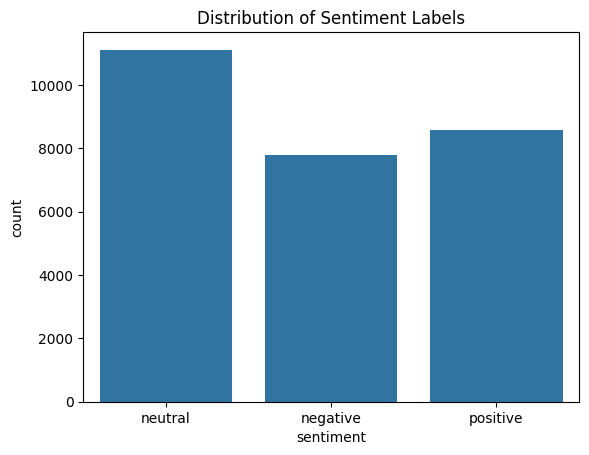

In [ ]:
# Distribution of sentiment labels
sns.countplot(x='sentiment', data=train_df)
plt.title("Distribution of Sentiment Labels")
plt.show()

In [ ]:
# 1. Transform sentiment into 3 classes
# Example mapping: positive -> 2, neutral -> 1, negative -> 0
sentiment_mapping = {"positive": 2, "neutral": 1, "negative": 0}
train_df["sentiment_class"] = train_df["sentiment"].map(sentiment_mapping)
test_df["sentiment_class"] = test_df["sentiment"].map(sentiment_mapping)

# 2. Extract all the values from the 'processed_text' column into a list
trainval_x = train_df["processed_text"].tolist()
trainval_y = train_df["sentiment_class"].tolist()

train_x, val_x, train_y, val_y = train_test_split(trainval_x, trainval_y, test_size=0.25, random_state=42)

test_x = test_df["processed_text"].tolist()
test_y = test_df["sentiment_class"].tolist()

In [ ]:
print(len(trainval_x),len(val_x),len(test_x))

27480 6870 3534


In [ ]:
# Hyperparameters
PRETRAINED_MODEL = "bert-base-uncased"
MAX_LENGTH = 128
BATCH_SIZE = 64
NUM_CLASSES = 3
LEARNING_RATE = 2e-5
EPOCHS = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Custom Dataset
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        """
        Args:
            texts (list): List of text samples.
            labels (list): List of sentiment labels (e.g., 0, 1).
            tokenizer (transformers.BertTokenizer): Tokenizer for BERT.
            max_length (int): Maximum length for tokenized sequences.
        """
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # Tokenize and encode the text
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt"
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "label": torch.tensor(label, dtype=torch.long)
        }

# Extract embeddings for all data
def extract_embeddings(model, dataloader, device):
    """
    Extracts embeddings for all data using a pre-trained BERT model.

    Args:
        model (transformers.BertModel): Pre-trained BERT model.
        dataloader (DataLoader): DataLoader for the dataset.
        device (torch.device): Device to run the model on (CPU or GPU).

    Returns:
        torch.Tensor: A matrix of size (number_of_samples, embedding_size).
    """
    model.eval()  # Set the model to evaluation mode
    embeddings = []

    with torch.no_grad():  # Disable gradient computation
        for batch in dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)

            # Forward pass through BERT
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            pooled_output = outputs.pooler_output  # CLS token representation

            # Append embeddings to the list
            embeddings.append(pooled_output.cpu())

    # Combine all embeddings into a single matrix
    return torch.cat(embeddings, dim=0)

# Initialize tokenizer, dataset, and dataloader
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL)
traindataset = TextDataset(train_x, train_y, tokenizer, MAX_LENGTH)
trainloader = DataLoader(traindataset, batch_size=BATCH_SIZE, shuffle=False)
valdataset = TextDataset(val_x, val_y, tokenizer, MAX_LENGTH)
valloader = DataLoader(valdataset, batch_size=BATCH_SIZE, shuffle=False)
text_testdataset = TextDataset(test_x, test_y, tokenizer, MAX_LENGTH)

text_testloader = DataLoader(text_testdataset, batch_size=BATCH_SIZE, shuffle=False)

bert = BertModel.from_pretrained(PRETRAINED_MODEL).to(device)
# Extract embeddings
train_embeddings = extract_embeddings(bert, trainloader, device)
train_embeddings =train_embeddings.cpu()

test_embeddings = extract_embeddings(bert , text_testloader, device)

val_embeddings = extract_embeddings(bert, valloader, device)
val_embeddings =val_embeddings.cpu()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
print(train_embeddings.size())
print(val_embeddings.size())


torch.Size([20610, 768])
torch.Size([6870, 768])


## Questions

**q0/  please analyse the dataset with differents classical machine learning model**

**q1/  please perform a classification with differents classical machine learning model and analyse the performences**

**q2/  please perform a classification with a MLP?**

**q3/  please analyse all the performences and explain which is the best**

**q4/  please use an LLM compare your performences to a LLM**

**q5/  please explain why I choose a BERT embedding instead of the raw text**

**q6/  please read the BERT paper and explain the BERT architecture**

**q7/  please finetue with LORA an LLM to classify the sentiment (optional)**

## Question 0 & 1


In [ ]:
# Table to store accuracy of different models
accuracy_table = pd.DataFrame(columns=["Model", "Accuracy"])
accuracy_table

,Model,Accuracy


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

## KNN


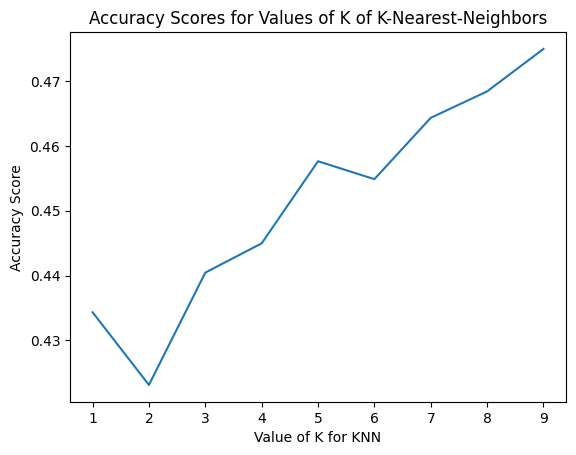

Accuracy of KNN model is : 0.4609507640067912


<ipython-input-24-3da6ef08e3bb>:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  accuracy_table = pd.concat([accuracy_table, new_row], ignore_index=True)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Elbow method to find the best K
k_range = range(1, 10)
scores = []
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(train_embeddings, train_y)
    knn_predictions = knn_model.predict(val_embeddings)
    scores.append(accuracy_score(val_y, knn_predictions))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of K of K-Nearest-Neighbors')
plt.show()
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_embeddings, train_y)
yhat = knn_model.predict(test_embeddings)
new_row = pd.DataFrame([{'Model': 'KNN', 'Accuracy':accuracy_score(test_y, yhat)}])
accuracy_table = pd.concat([accuracy_table, new_row], ignore_index=True)
print('Accuracy of KNN model is :',accuracy_score(test_y, yhat))

## LOGISTIC REGRESSION


In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
best_accuracy = 0
best_solver = ''
for solver in ['newton-cg', 'lbfgs', 'sag', 'saga']:
    logistic_model = LogisticRegression(max_iter=10000, solver=solver,C=10, random_state=42)
    logistic_model.fit(train_embeddings, train_y)
    logistic_predictions = logistic_model.predict(val_embeddings)
    logistic_accuracy = accuracy_score(val_y, logistic_predictions)
    print(f'Logistic Regression ({solver}) Accuracy: {logistic_accuracy:.2f}')
    yhat = logistic_model.predict(test_embeddings)
    acc = accuracy_score(test_y, yhat)
    print(f'Logistic Regression ({solver}) Accuracy: {acc:.2f}')
    if acc > best_accuracy:
        best_accuracy = acc
        best_solver = solver
new_row = pd.DataFrame([{'Model': 'Logistic Regression '+best_solver, 'Accuracy':best_accuracy}])
accuracy_table = pd.concat([accuracy_table, new_row], ignore_index=True)

Logistic Regression (newton-cg) Accuracy: 0.64
Logistic Regression (newton-cg) Accuracy: 0.65
Logistic Regression (lbfgs) Accuracy: 0.64
Logistic Regression (lbfgs) Accuracy: 0.65
Logistic Regression (sag) Accuracy: 0.64
Logistic Regression (sag) Accuracy: 0.65
Logistic Regression (saga) Accuracy: 0.64
Logistic Regression (saga) Accuracy: 0.65


## DECISION TREE


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(train_embeddings, train_y)
decision_tree_predictions = decision_tree_model.predict(val_embeddings)
decision_tree_accuracy = accuracy_score(val_y, decision_tree_predictions)
print(f'Decision Tree Validation Accuracy: {decision_tree_accuracy:.2f}')
yhat = decision_tree_model.predict(test_embeddings)
acc = accuracy_score(test_y, yhat)
new_row = pd.DataFrame([{'Model': 'Decision Tree', 'Accuracy':acc}])
accuracy_table = pd.concat([accuracy_table, new_row], ignore_index=True)
print(f'Decision Tree Test Accuracy: {acc:.2f}')

Decision Tree Validation Accuracy: 0.42
Decision Tree Test Accuracy: 0.42


## RANDOM FOREST


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100,)
random_forest_model.fit(train_embeddings, train_y)
random_forest_predictions = random_forest_model.predict(val_embeddings)
random_forest_accuracy = accuracy_score(val_y, random_forest_predictions)
print(f'Random Forest Validation Accuracy: {random_forest_accuracy:.2f}')
yhat = random_forest_model.predict(test_embeddings)
acc = accuracy_score(test_y, yhat)
new_row = pd.DataFrame([{'Model': 'Random Forest', 'Accuracy':acc}])
accuracy_table = pd.concat([accuracy_table, new_row], ignore_index=True)
print(f'Random Forest Test Accuracy: {acc:.2f}')

Random Forest Validation Accuracy: 0.54
Random Forest Test Accuracy: 0.55


## SVM


In [ ]:

from sklearn.svm import SVC
best_accuracy = 0
best_kernel = ''
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for C in [0.1, 1]:
        svm_model = SVC(kernel=kernel, C=C, random_state=42)
        svm_model.fit(train_embeddings, train_y)
        svm_predictions = svm_model.predict(val_embeddings)
        svm_accuracy = accuracy_score(val_y, svm_predictions)
        print(f'SVM ({kernel}, C={C}) Validation Accuracy: {svm_accuracy:.2f}')
        yhat = svm_model.predict(test_embeddings)
        acc = accuracy_score(test_y, yhat)
        print(f'SVM ({kernel}, C={C}) Test Accuracy: {acc:.2f}')
        if acc > best_accuracy:
            best_accuracy = acc
            best_kernel = kernel
new_row = pd.DataFrame([{'Model': 'SVM '+best_kernel, 'Accuracy': best_accuracy}])
accuracy_table = pd.concat([accuracy_table, new_row], ignore_index=True)


**Performance of all models**

In [ ]:
accuracy_table

,Model,Accuracy
0,KNN,0.460951
1,Logistic Regression newton-cg,0.652235
2,Decision Tree,0.415676
3,Random Forest,0.551500
4,SVM linear,0.651387



## Question 2


## MLP

In [ ]:
criterion= nn.CrossEntropyLoss()

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

# Custom Dataset
class EmbeddingDataset(Dataset):
    def __init__(self, embeddings, labels):
        """
        Args:
            texts (list): List of text samples.
            labels (list): List of sentiment labels (e.g., 0, 1).
            tokenizer (transformers.BertTokenizer): Tokenizer for BERT.
            max_length (int): Maximum length for tokenized sequences.
        """
        self.embeddings = embeddings
        self.labels = labels

    def __len__(self):
        return len(self.embeddings)

    def __getitem__(self, idx):
        # Tokenize and encode the text
        embeddings = self.embeddings[idx]
        label = self.labels[idx]

        return {
            "input_ids": embeddings.squeeze(0),
            "label": torch.tensor(label, dtype=torch.long)
        }

# Model Definition
import torch.nn as nn

class SentimentClassifier(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes, dropout_rate=0.2):
        super(SentimentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(hidden_size2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.bn3 = nn.BatchNorm1d(hidden_size3)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(hidden_size3, num_classes)

    def forward(self, input_ids):
        x = self.fc1(input_ids)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

# training script

def train( model, train_loader, optimizer, epoch,log_interval=50):
    model.train()
    loss_cpu=0
    correct = 0
    total = 0
    for batch_idx, data in enumerate(train_loader, 0):

        # get the inputs; data is a list of [inputs, labels]
        inputs, target = data['input_ids'],data['label']
        inputs, target = inputs.cuda(), target.cuda()
        inputs =inputs.detach()
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        loss_cpu+= loss.item()
        total += target.size(0)
        correct += predicted.eq(target.data).cpu().sum()

        if batch_idx % log_interval == 0:
            print('| Epoch [%3d/%3d] Iter[%3d/%3d]\t\tLoss: %.4f Acc@1: %.3f%%'
                %(epoch, EPOCHS, batch_idx+1,
                    (len(train_loader)//BATCH_SIZE)+1, loss.item(), 100.*correct/total))
            #n_iter=epoch * len(train_loader) + batch_idx

    return loss_cpu/len(train_loader)

# testing script
def test(model, test_loader, epoch):
    model.eval()
    correct = 0
    total = 0
    test_loss_MSE = 0 # Renamed to val_loss for clarity in this context
    with torch.no_grad():
        for batch_idx, data in enumerate(test_loader, 0):
            inputs, target = data['input_ids'],data['label']
            inputs, target = inputs.cuda().float(), target.cuda()
            outputs  = model(inputs)
            loss = criterion(outputs,target)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += predicted.eq(target.data).cpu().sum()
            test_loss_MSE+= loss.item()

    val_loss = test_loss_MSE/ len(test_loader) # Renamed to val_loss
    val_accuracy = 100.*correct/total
    print("\n| Validation Epoch #%d\t\t\tLoss: %.4f Acc@1: %.2f%%" %(epoch, val_loss, val_accuracy)) # Use val_loss in print
    return val_loss, val_accuracy # Return val_loss

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np


# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Let us Train.")


# Hyperparameter Grid
suggested_params = {
    'hidden_size1': [768],      # hidden layer 1
    'hidden_size2': [512],      # hidden layer 2
    'hidden_size3': [256],      # hidden layer 3
    'dropout_rate': [0.3],      # Moderate dropout
    'learning_rate': [2e-5],     # Moderate learning rate
    'weight_decay': [1e-2],     # Moderate weight decay
    'batch_size': [32]          # Smaller batch size
}
EPOCHS = 30


for params in ParameterGrid(suggested_params):
    train_embedding_dataset = EmbeddingDataset(train_embeddings, train_y)
    val_embedding_dataset = EmbeddingDataset(val_embeddings, val_y)

    # Create DataLoaders for training and validation using the EmbeddingDatasets
    train_embedding_loader = DataLoader(train_embedding_dataset, batch_size=params['batch_size'], shuffle=True)
    val_embedding_loader = DataLoader(val_embedding_dataset, batch_size=params['batch_size'], shuffle=False)
    print(f"\n--- Training with parameters: {params} ---")
    BATCH_SIZE = params['batch_size'] # Set batch size from current params
    # Initialize model and optimizer with current hyperparameters
    model = SentimentClassifier(768, params['hidden_size1'], params['hidden_size2'],params['hidden_size2'], 3, params['dropout_rate']).to(device)
    optimizer = AdamW(model.parameters(), lr=params['learning_rate'], weight_decay=params['weight_decay'])
    scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.1)

    best_val_accuracy = 0
    best_epoch = 0

    for epoch in range(EPOCHS):
        train_loss = train(model, train_embedding_loader, optimizer, epoch)
        val_loss, val_accuracy = test(model, val_embedding_loader, epoch)

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_epoch = epoch + 1

        scheduler.step(val_loss)

print(f"Best Validation Accuracy: {best_val_accuracy:.2f}% at Epoch {best_epoch}")



print("\n--- Evaluating Best Model on Test Set ---")

tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL)
text_testdataset = TextDataset(test_x, test_y, tokenizer, MAX_LENGTH)
text_testloader = DataLoader(text_testdataset, batch_size=BATCH_SIZE, shuffle=False)
bert = BertModel.from_pretrained(PRETRAINED_MODEL).to(device)
test_embeddings = extract_embeddings(bert, text_testloader, device)
test_embeddings = test_embeddings.cpu()
test_embedding_dataset = EmbeddingDataset(test_embeddings, test_y)
test_embedding_loader = DataLoader(test_embedding_dataset, batch_size=BATCH_SIZE, shuffle=False)


test_loss, test_accuracy = test(model, test_embedding_loader, EPOCHS)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Let us Train.

--- Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_size1': 768, 'hidden_size2': 512, 'hidden_size3': 256, 'learning_rate': 2e-05, 'weight_decay': 0.01} ---
| Epoch [  0/ 30] Iter[  1/ 21]		Loss: 1.1935 Acc@1: 37.500%
| Epoch [  0/ 30] Iter[ 51/ 21]		Loss: 1.3083 Acc@1: 38.051%
| Epoch [  0/ 30] Iter[101/ 21]		Loss: 0.9855 Acc@1: 39.728%
| Epoch [  0/ 30] Iter[151/ 21]		Loss: 1.0857 Acc@1: 41.349%
| Epoch [  0/ 30] Iter[201/ 21]		Loss: 1.0720 Acc@1: 42.739%
| Epoch [  0/ 30] Iter[251/ 21]		Loss: 0.9510 Acc@1: 44.211%
| Epoch [  0/ 30] Iter[301/ 21]		Loss: 1.1365 Acc@1: 44.643%
| Epoch [  0/ 30] Iter[351/ 21]		Loss: 0.9327 Acc@1: 45.228%
| Epoch [  0/ 30] Iter[401/ 21]		Loss: 0.9149 Acc@1: 45.792%
| Epoch [  0/ 30] Iter[451/ 21]		Loss: 1.0025 Acc@1: 46.251%
| Epoch [  0/ 30] Iter[501/ 21]		Loss: 0.9835 Acc@1: 46.669%
| Epoch [  0/ 30] Iter[551/ 21]		Loss: 1.0925 Acc@1: 46.852%
| Epoch [  0/ 30] Iter[601/ 21]		Loss: 1.0840 Acc@1: 47.073%

| Valida

# Accuracy MLP : 63.38 %


## Question 3


# Analyse comparative des modèles

La **régression logistique (Test Accuracy : 65.22%)** et le **SVM linéaire (Test Accuracy : 65.14%)** offrent les meilleures performances, ce qui suggère que les données sont **linéairement séparables**. La régression logistique est plus rapide à entraîner, tandis que le SVM optimise mieux les marges de séparation.

Le **MLP (Test Accuracy : 63.38%)**, doté de **quatre couches**, obtient une performance légèrement inférieure à celles de la régression logistique et du SVM. Sa **validation loss élevée (0.8)** suggère un **surajustement**, ce qui signifie qu'il apprend bien les données d'entraînement mais généralise moins bien aux nouvelles données. Une régularisation plus forte ou un ensemble de données plus large pourrait améliorer ses performances.

Le **Random Forest (Test Accuracy : 55.15%)**, bien que plus robuste qu’un arbre de décision, affiche une performance inférieure et pourrait bénéficier d’un ajustement des hyperparamètres. Enfin, le **KNN (Test Accuracy : 46.09%)** et l’**arbre de décision (Test Accuracy : 41.57%)** présentent les performances les plus faibles, probablement en raison de leur **sensibilité aux variations des données** et du risque de **surapprentissage**.



## Question 4

## Roberta LLM

In [ ]:
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
device = 0 if torch.cuda.is_available() else -1
# Load sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=device)


# Get model predictions
test_df["predicted_label"] = test_df["processed_text"].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# Convert labels to match expected format
label_mapping = {"LABEL_0": 0, "LABEL_1": 1, "LABEL_2": 2}
test_df["predicted_label"] = test_df["predicted_label"].map(label_mapping)

# Compute evaluation metrics
y_true = test_df["sentiment_class"]
y_pred = test_df["predicted_label"]

accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_true, y_pred))

## Question 5

Nous avons opté pour les embeddings BERT au lieu du texte brut car le texte brut, en tant que simple séquence de caractères, est inexploitable directement par les algorithmes d'apprentissage automatique et ne capture pas la richesse sémantique et contextuelle du langage.  Les embeddings BERT, au contraire, offrent une représentation numérique dense et contextuelle des mots.  Cette supériorité découle directement de l'architecture de BERT, décrite dans l'article original comme une architecture de **Transformers bidirectionnels**.



## Question 6

BERT repose sur un **stack de couches encodeurs Transformer**.  L'architecture Transformer, basée sur le mécanisme d'**attention**, permet de modéliser les relations entre tous les mots d'une phrase, capturant ainsi le contexte de manière bidirectionnelle (en considérant à la fois le contexte gauche et droit d'un mot).  BERT est **pré-entraîné** sur deux tâches principales : **Masked Language Model (MLM)**, où le modèle doit prédire des mots masqués aléatoirement dans le texte, et **Next Sentence Prediction (NSP)**, où il doit déterminer si deux phrases se suivent logiquement.  Ce pré-entraînement massif permet à BERT d'acquérir une compréhension profonde du langage,  encodant des informations sémantiques et syntaxiques complexes dans ses embeddings.  Ainsi, en utilisant les embeddings BERT, nous bénéficions d'une représentation du texte  **riche en contexte,  adaptée aux modèles d'apprentissage automatique, et  issue d'un modèle pré-entraîné ayant déjà acquis une compréhension linguistique significative**, ce qui est  nettement supérieur à l'utilisation du texte brut.

## Question 7

## Fine Tuning the LLM

In [ ]:
%pip install evaluate peft datasets
%pip install accelerate>=0.26.0
%pip install transformers[torch]
import torch
import pandas as pd
from transformers import RobertaTokenizer, RobertaForSequenceClassification, TrainingArguments, Trainer, DataCollatorForLanguageModeling
from peft import LoraConfig, get_peft_model, TaskType
import evaluate
from datasets import Dataset
from transformers import DataCollatorWithPadding # Import DataCollatorWithPadding
MAX_LENGTH = 128

# Preparing the DataFrames
train_df['labels']=train_df['sentiment_class']
val_df = pd.DataFrame({'processed_text': val_x, 'labels': val_y})

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load tokenizer and base model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=3).to(device)  # 3 sentiment classes

# Apply LoRA
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["query", "value"],
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.SEQ_CLS
)
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

# Convert DataFrames to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)
val_df = pd.DataFrame({'processed_text': val_x, 'labels': val_y})
valdataset = Dataset.from_pandas(val_df) # Convert val_df to Hugging Face Dataset


# Tokenize function
def tokenize_function(examples):
    return tokenizer(examples["processed_text"], padding="max_length", truncation=True, max_length=MAX_LENGTH)

train_dataset = train_dataset.map(tokenize_function, batched=True)

test_dataset = test_dataset.map(tokenize_function, batched=True)
valdataset = valdataset.map(tokenize_function, batched=True) # Tokenize valdataset

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    per_device_train_batch_size=32,  # Increase batch size for GPU
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    save_total_limit=2,
    push_to_hub=False,
    report_to="none",
    fp16=True  # Enable mixed precision for faster training
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer) # Use DataCollatorWithPadding

# Load accuracy metric
accuracy_metric = evaluate.load("accuracy")

# Define compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    metric = accuracy_metric.compute(predictions=predictions, references=labels)
    return {'eval_accuracy': metric['accuracy']} # Return with key 'eval_accuracy'
# Trainer
trainer = Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=train_dataset,
        eval_dataset=valdataset,
        compute_metrics=compute_metrics
)


# Train model on GPU
trainer.train()





# Performance apres fine-tuning : 77.8748%